In [ ]:
!pip install nltk
!pip install wordcloud
!pip install seaborn


import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/reddit_wsb.csv')


In [ ]:

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()


In [ ]:
# Apply VADER to the title column
title_scores = df['title'].apply(lambda x: sid.polarity_scores(str(x)))
df['title_positive'] = title_scores.apply(lambda x: x['pos'])
df['title_negative'] = title_scores.apply(lambda x: x['neg'])
df['title_neutral'] = title_scores.apply(lambda x: x['neu'])
df['title_compound'] = title_scores.apply(lambda x: x['compound'])
df['title_sentiment'] = df['title_compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

# Apply VADER to the body column with error handling
def get_body_sentiment(x):
    try:
        return sid.polarity_scores(str(x))
    except:
        return {'pos': 0.0, 'neg': 0.0, 'neu': 1.0, 'compound': 0.0}

body_scores = df['body'].apply(get_body_sentiment)
df['body_positive'] = body_scores.apply(lambda x: x['pos'])
df['body_negative'] = body_scores.apply(lambda x: x['neg'])
df['body_neutral'] = body_scores.apply(lambda x: x['neu'])
df['body_compound'] = body_scores.apply(lambda x: x['compound'])
df['body_sentiment'] = df['body_compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))



In [ ]:

# Display the results
print(df[['title', 'title_positive', 'title_negative', 'title_neutral', 'title_compound',
          'body', 'body_positive', 'body_negative', 'body_neutral', 'body_compound']])


                                                   title  title_positive  \
0      It's not about the money, it's about sending a...           0.000   
1      Math Professor Scott Steiner says the numbers ...           0.000   
2                                        Exit the system           0.000   
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...           0.135   
4      Not to distract from GME, just thought our AMC...           0.119   
...                                                  ...             ...   
53182    What I Learned Investigating SAVA FUD Spreaders           0.000   
53183  Daily Popular Tickers Thread for August 02, 20...           0.219   
53184       Hitler reacts to the market being irrational           0.000   
53185        Daily Discussion Thread for August 02, 2021           0.000   
53186  Fraternal Association of Gambling Gentlemen an...           0.000   

       title_negative  title_neutral  title_compound  \
0               0.000          

In [ ]:
# Save the DataFrame to a new CSV file
# Replace '/content/sentiment_results.csv' with your desired file path and name
df.to_csv('/content/output2.csv', index=False)


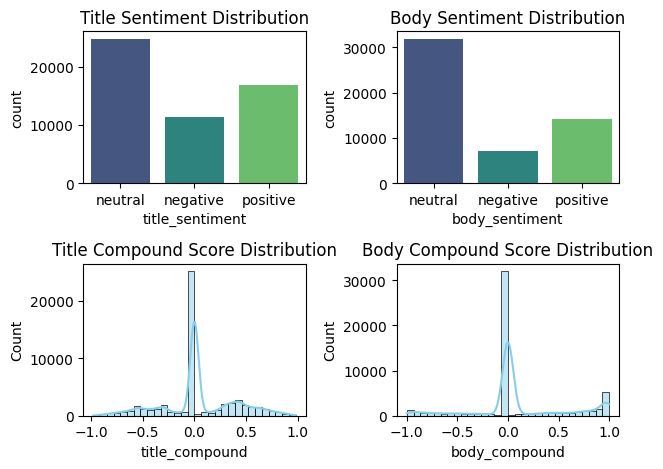

In [ ]:
# Plotting title sentiments
plt.subplot(2, 2, 1)
sns.countplot(x='title_sentiment', data=df, palette='viridis')
plt.title('Title Sentiment Distribution')

# Plotting body sentiments
plt.subplot(2, 2, 2)
sns.countplot(x='body_sentiment', data=df, palette='viridis')
plt.title('Body Sentiment Distribution')

# Plotting compound scores distribution for title
plt.subplot(2, 2, 3)
sns.histplot(df['title_compound'], bins=30, kde=True, color='skyblue')
plt.title('Title Compound Score Distribution')

# Plotting compound scores distribution for body
plt.subplot(2, 2, 4)
sns.histplot(df['body_compound'], bins=30, kde=True, color='skyblue')
plt.title('Body Compound Score Distribution')

plt.tight_layout()
plt.show()


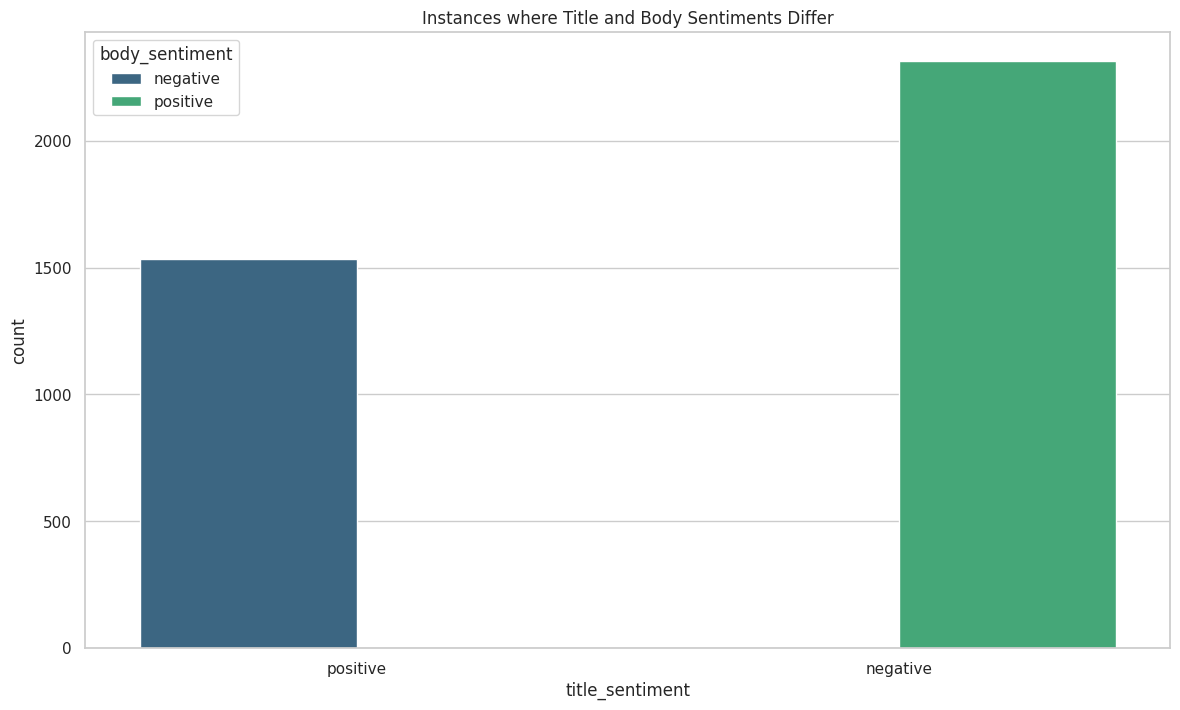

In [ ]:
# Identify instances where title sentiment is positive but body sentiment is negative
mismatched_data_positive_title = df[(df['title_sentiment'] == 'positive') & (df['body_sentiment'] == 'negative')]

# Identify instances where title sentiment is negative but body sentiment is positive
mismatched_data_negative_title = df[(df['title_sentiment'] == 'negative') & (df['body_sentiment'] == 'positive')]

# Concatenate the two mismatched datasets
combined_mismatched_data = pd.concat([mismatched_data_positive_title, mismatched_data_negative_title])

# Plotting settings for better visualization
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plotting a combined bar plot for mismatched instances
sns.countplot(x='title_sentiment', data=combined_mismatched_data, palette='viridis', hue='body_sentiment')
plt.title('Instances where Title and Body Sentiments Differ')

plt.show()


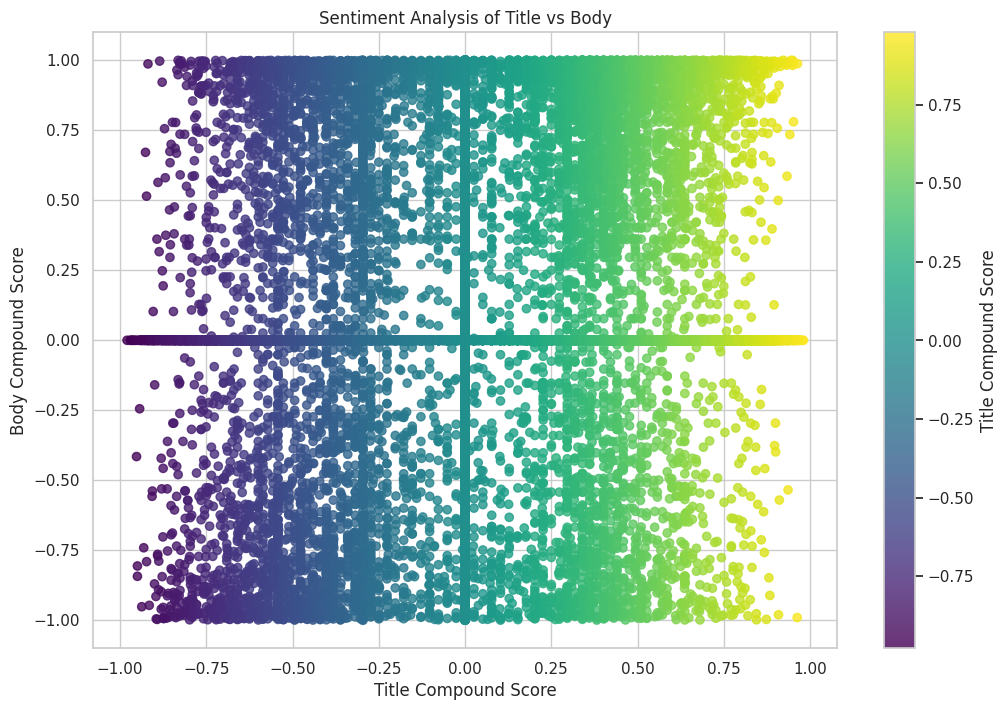

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Scatter plot for sentiment analysis of title and body
plt.scatter(df['title_compound'], df['body_compound'], c=df['title_compound'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Title Compound Score')
plt.title('Sentiment Analysis of Title vs Body')
plt.xlabel('Title Compound Score')
plt.ylabel('Body Compound Score')

plt.show()


#X-axis represents the compound sentiment score for the title.
#Y-axis represents the compound sentiment score for the body.
#Color represents the compound sentiment score for the title, with a color bar indicating the scale.
#Points that deviate from the diagonal line suggest discrepancies in sentiment between the title and body.

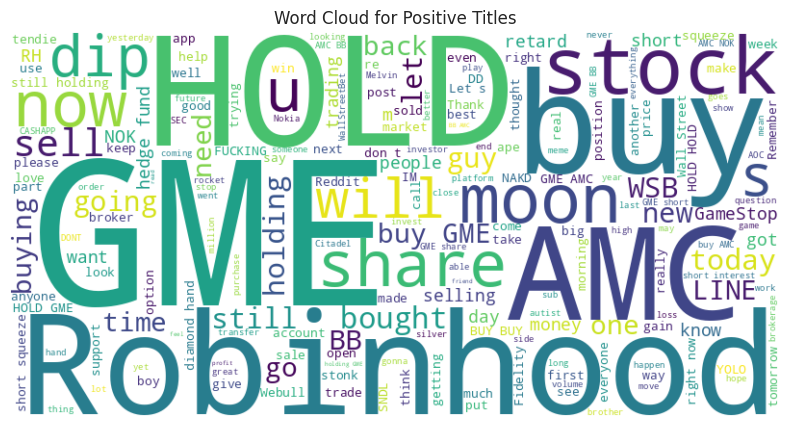

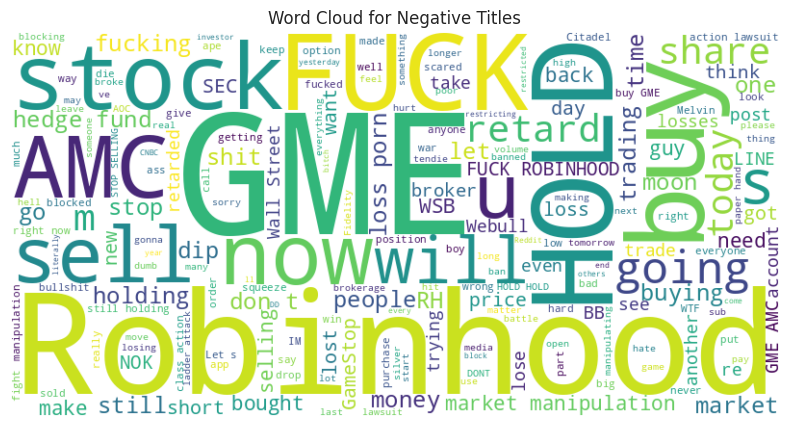

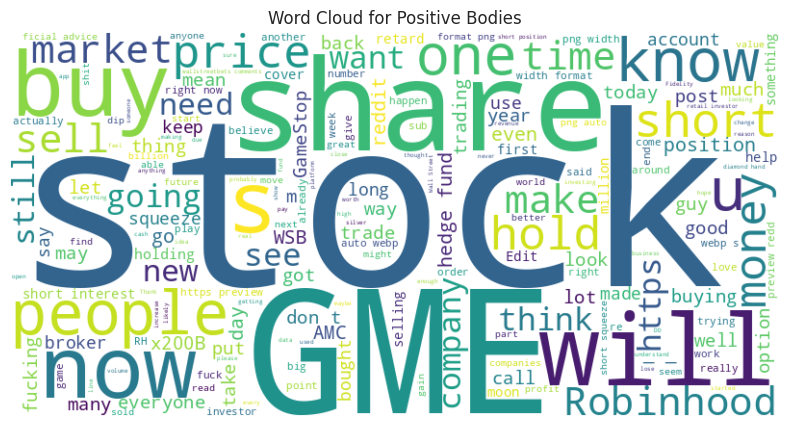

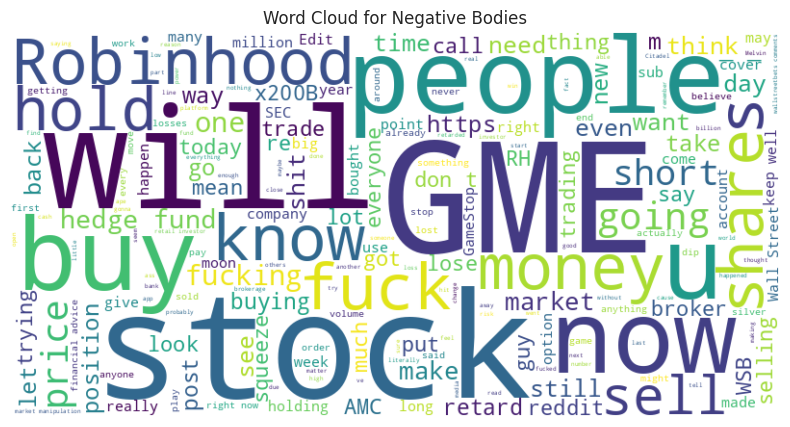

In [ ]:


# Function to handle NaN values and generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Convert 'body' column to strings and replace NaN values with empty strings
df['body'] = df['body'].astype(str)

# Generate word cloud for positive titles
positive_titles_text = ' '.join(df[df['title_sentiment'] == 'positive']['title'])
generate_wordcloud(positive_titles_text, 'Word Cloud for Positive Titles')

# Generate word cloud for negative titles
negative_titles_text = ' '.join(df[df['title_sentiment'] == 'negative']['title'])
generate_wordcloud(negative_titles_text, 'Word Cloud for Negative Titles')

# Generate word cloud for positive bodies, handling NaN values
positive_bodies_text = ' '.join(df[df['body_sentiment'] == 'positive']['body'].replace('nan', '', regex=True))
generate_wordcloud(positive_bodies_text, 'Word Cloud for Positive Bodies')

# Generate word cloud for negative bodies
negative_bodies_text = ' '.join(df[df['body_sentiment'] == 'negative']['body'])
generate_wordcloud(negative_bodies_text, 'Word Cloud for Negative Bodies')


In [ ]:
print(df.columns)


Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp', 'title_positive', 'title_negative', 'title_neutral',
       'title_compound', 'title_sentiment', 'body_positive', 'body_negative',
       'body_neutral', 'body_compound', 'body_sentiment'],
      dtype='object')


<ipython-input-24-c7174f415531>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sentiment = df.resample('D').mean()


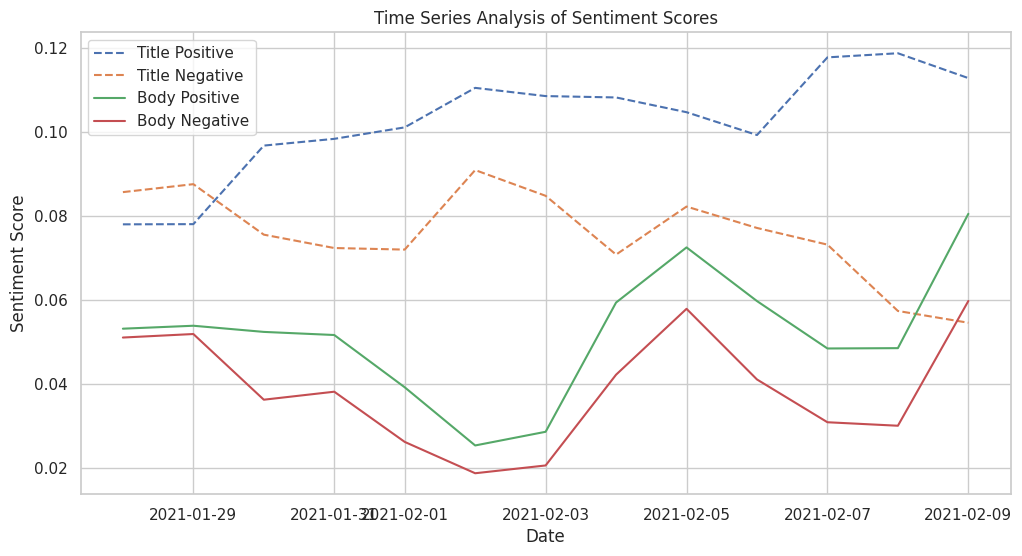

In [ ]:
# Assuming 'timestamp' is the column containing datetime information
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' as the index for time series analysis
df.set_index('timestamp', inplace=True)

# Resample data to daily frequency and calculate mean sentiment scores
daily_sentiment = df.resample('D').mean()

# Plotting time series for positive, negative, and neutral sentiments
plt.figure(figsize=(12, 6))

plt.plot(daily_sentiment.index, daily_sentiment['title_positive'], label='Title Positive', linestyle='--')
plt.plot(daily_sentiment.index, daily_sentiment['title_negative'], label='Title Negative', linestyle='--')
plt.plot(daily_sentiment.index, daily_sentiment['body_positive'], label='Body Positive')
plt.plot(daily_sentiment.index, daily_sentiment['body_negative'], label='Body Negative')

plt.title('Time Series Analysis of Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


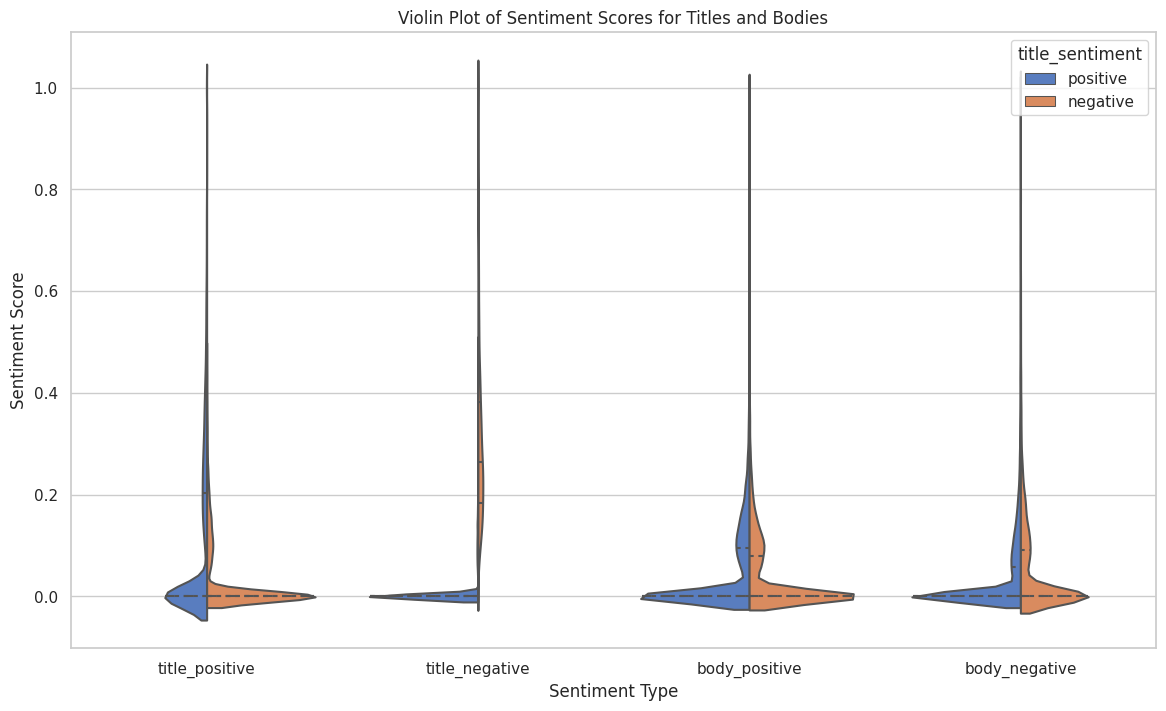

In [ ]:

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a new DataFrame for easier plotting
plot_df = df[['title_sentiment', 'body_sentiment', 'title_positive', 'title_negative', 'body_positive', 'body_negative']].copy()

# Melt the DataFrame for easier plotting
plot_df = pd.melt(plot_df, id_vars=['title_sentiment', 'body_sentiment'], value_vars=['title_positive', 'title_negative', 'body_positive', 'body_negative'],
                  var_name='Sentiment Type', value_name='Sentiment Score')

# Plotting Violin Plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sentiment Type', y='Sentiment Score', hue='title_sentiment', data=plot_df, split=True, inner="quart", palette="muted")
plt.title('Violin Plot of Sentiment Scores for Titles and Bodies')
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Score')
plt.show()


<ipython-input-27-0340d7a825d0>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sentiment = df.resample('D').mean()


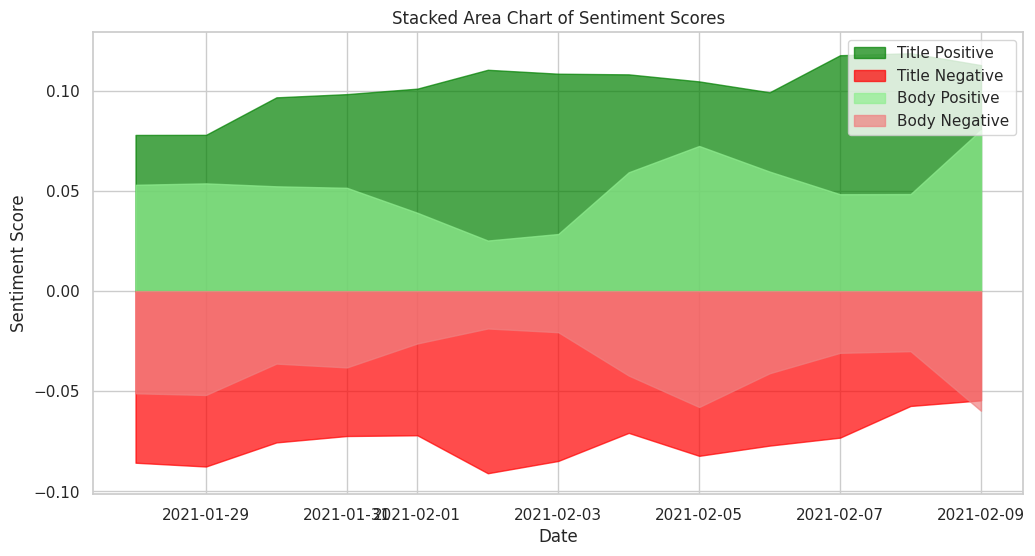

In [ ]:

# Assuming 'timestamp' is the column containing datetime information

# Set 'timestamp' as the index for time series analysis

# Resample data to daily frequency and calculate mean sentiment scores
daily_sentiment = df.resample('D').mean()

# Plotting stacked area chart for positive and negative sentiments
plt.figure(figsize=(12, 6))

plt.fill_between(daily_sentiment.index, 0, daily_sentiment['title_positive'], label='Title Positive', color='green', alpha=0.7)
plt.fill_between(daily_sentiment.index, 0, -daily_sentiment['title_negative'], label='Title Negative', color='red', alpha=0.7)
plt.fill_between(daily_sentiment.index, 0, daily_sentiment['body_positive'], label='Body Positive', color='lightgreen', alpha=0.7)
plt.fill_between(daily_sentiment.index, 0, -daily_sentiment['body_negative'], label='Body Negative', color='lightcoral', alpha=0.7)

plt.title('Stacked Area Chart of Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()
